<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/CV_stat_math/class_07_licence_plate_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [3]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow

In [4]:
# https://github.com/ayusuke7/OpencvPython

In [5]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


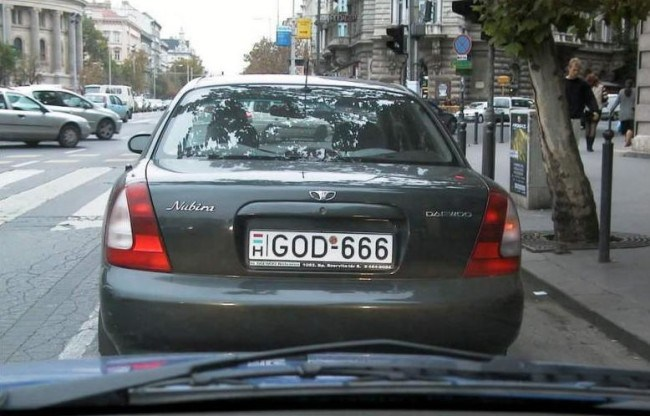

In [6]:
source= 'carro3.jpg'
img = cv2.imread(source)
cv2_imshow(img)

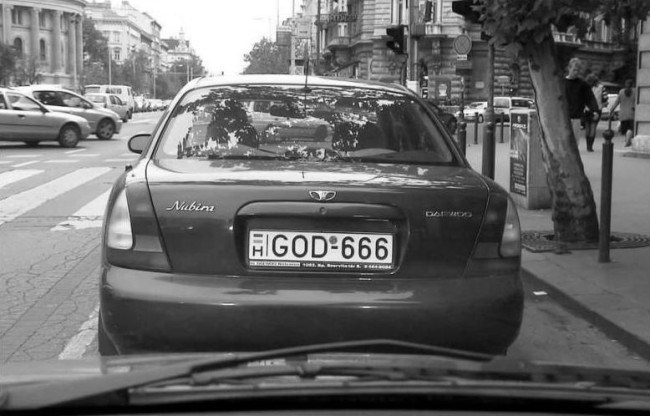

In [7]:
cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(cinza)

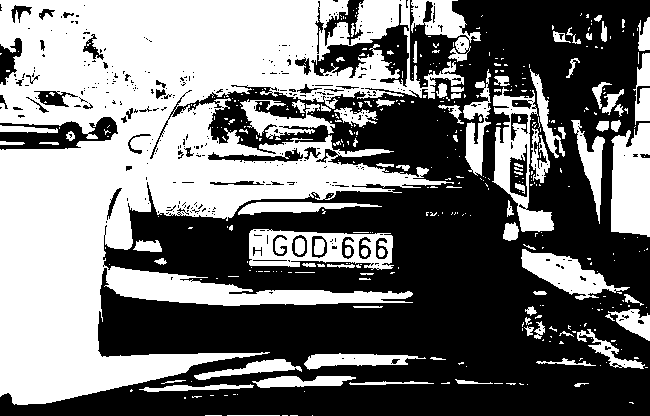

In [8]:
test, bin = cv2.threshold(cinza, 100, 255, cv2.THRESH_BINARY)
cv2_imshow(bin)

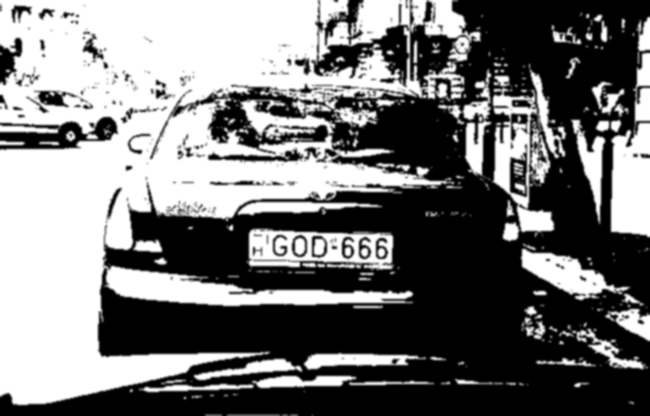

In [9]:
desfoque = cv2.GaussianBlur(bin, (5, 5), 0)
cv2_imshow(desfoque)

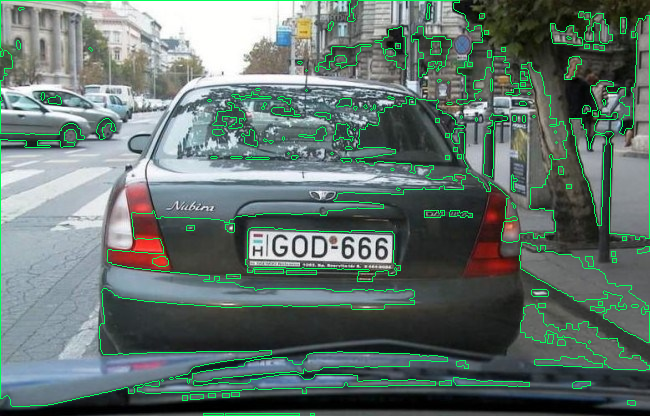

In [10]:
contornos, hierarquia = cv2.findContours(desfoque, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contornos, -1, (90, 255, 0), 1)
cv2_imshow(img)

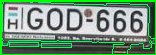

In [11]:
for c in contornos:
    perimetro = cv2.arcLength(c, True)
    if perimetro > 120:
        aprox = cv2.approxPolyDP(c, 0.03 * perimetro, True)
        if len(aprox) == 4:
            (x, y, alt, lar) = cv2.boundingRect(c)
            cv2.rectangle(img, (x, y), (x + alt, y + lar), (0, 255, 0), 2)
            roi = img[y:y + lar, x:x + alt]
cv2_imshow( roi)


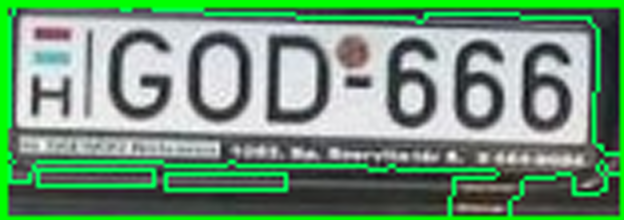

In [12]:
resize_img_roi = cv2.resize(roi, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
cv2_imshow(resize_img_roi)


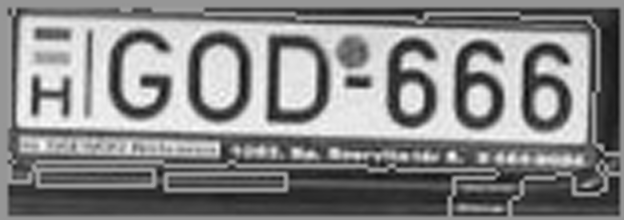

In [13]:
img_cinza = cv2.cvtColor(resize_img_roi, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_cinza)

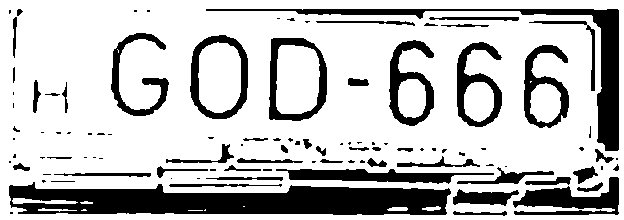

In [14]:
_, img_binary = cv2.threshold(img_cinza, 70, 255, cv2.THRESH_BINARY)
cv2_imshow(img_binary)

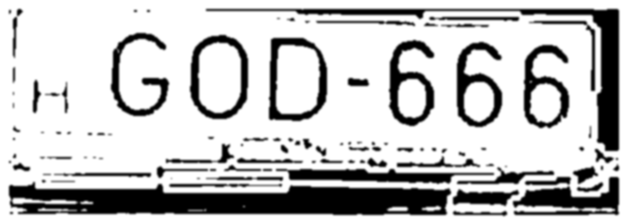

In [15]:
img_desfoque = cv2.GaussianBlur(img_binary, (5, 5), 0)
img_ocr = img_desfoque
cv2_imshow(img_ocr)

In [16]:
config = r'-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 6'
texto = pytesseract.image_to_string(img_ocr, lang='eng', config=config)
print(texto)

GOD666

